In [105]:
import numpy as np
import pandas as pd
from pygmid import Lookup as lk
import matplotlib.pyplot as plt

#### Technology data

In [106]:
table_path = '/home/bmurmann/eda/designs/Book-on-gm-ID-design/starter_files_open_source_tools/ihp-sg13g2/simulation/'
n = lk(table_path+'sg13_lv_nmos.mat')

#### Specifications

In [107]:
av0 = 4; rs = 10e3; cl = 200e-15

#### Design choices

In [ ]:
l = 0.13; wfing = 5; gm_id = np.linspace(8, 25, num=100); rd_range = np.linspace(0.5e3, 10e3, num=100)

#### Sizing and benchmarking

In [115]:
id_array = np.zeros((gm_id.size, rd_range.size))
bw_array = np.zeros((gm_id.size, rd_range.size))
for index in range(len(rd_range)):
    rd = rd_range[index]
    gmrds = n.lookup('GM_GDS', GM_ID=gm_id, L=l)
    gm = 1/rd*(1/av0 - 1/gmrds)**-1
    id = gm/gm_id 
    w = id/n.lookup('ID_W', GM_ID=gm_id, L=l)
    nf = 1+np.floor_divide(w, wfing)

    # Compute capacitances
    cgs = w*n.lookup('CGS_W', GM_ID=gm_id, L=l)
    cgd = w*n.lookup('CGD_W', GM_ID=gm_id, L=l)
    cdd = w*n.lookup('CDD_W', GM_ID=gm_id, L=l)
    cdb = cdd-cgd
    cltot = cl+cdb

    # Estimate bandwidth
    rds = gmrds/gm
    rdtot = rds*rd/(rds+rd)
    tau1 = rs*(cgs + cgd*(1+av0)) + rdtot*(cltot+cgd)
    bw_array[:, index] = 1/2/np.pi/tau1
    id_array[:, index] = id

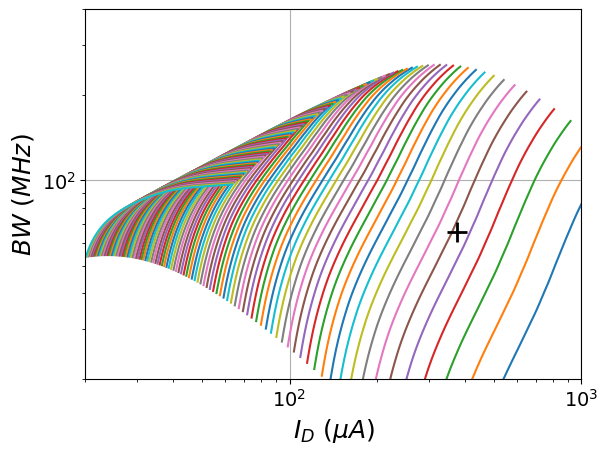

In [118]:
id_ex2 = 376
bw_ex2 = 65.9

plt.loglog(id_array/1e-6, (bw_array/1e6), linestyle='-')
plt.loglog(id_ex2, bw_ex2, marker='+', markersize=15, markeredgewidth=2, linestyle='None', color='black')
plt.xlim(2e1, 1e3)
plt.ylim(20, 400)
plt.xlabel("$I_D$ ($\\mu A$)", fontsize=18)
plt.ylabel("$BW$ ($MHz$)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()